# Working with Image Data

In this notebook we're going to illustrate some simple examples of working with image data in Python.  

Image analysis tasks like trimming, normalizing, and segmentation are commonly used in the biological sciences in the context of phenotyping, microscopy, object tracking, etc. 

The examples here illustrate simple functions built into matplotlib and numpy. For more sophisticated image analysis tools check out the [scikit-image](https://scikit-image.org/) library.

## Data 

We'll use two example images which can be found on the course wiki

* [chesterdog.jpg](https://raw.githubusercontent.com/Bio724D/Bio724D_2023_2024/main/data/chesterdog.jpg)
* [yeast_colonies.jpg](https://raw.githubusercontent.com/Bio724D/Bio724D_2023_2024/main/data/chesterdog.jpg)

Download these into your working directory.

## Libraries

In [1]:
import numpy as np  # numpy provides support for arrays
from matplotlib import pyplot as plt  # the pyplot sublibrary is the default plotting interface
from matplotlib import image  # the image sublibrary provides support for loading image data

## Reading the images

In [2]:
chester = image.imread("chesterdog.jpg")
colonies = image.imread("yeast_colonies.jpg")

When using the matplotlib image library, images are loaded as numpy arrays.  

In [3]:
type(chester)

numpy.ndarray

Let's start by checking out the shape of these arrays we got back so we understand their dimensions.

In [4]:
chester.shape

(556, 605, 3)

In [5]:
colonies.shape

(184, 286)

Notice that the object `chester` has three dimensions, while `colonies` only has two. This is because the image file `chesterdog.jpg` is a color image with red, green, and blue (RGB) data for each pixel in the image.  `yeast_colonies.jpg` is a grayscale image with only a single value per pixel.

## Plotting images

Having loaded the images we can now plot them as follows using the `imshow()` function defined in the pyplot sublibrary of matplotlib:

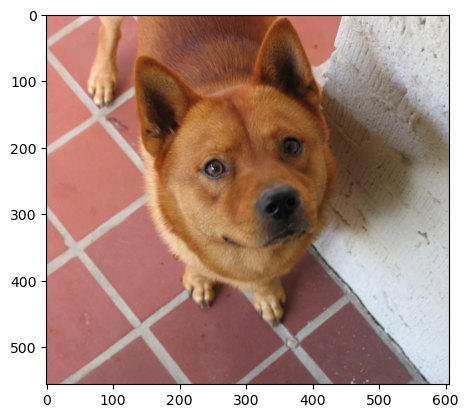

In [6]:
plt.imshow(chester)

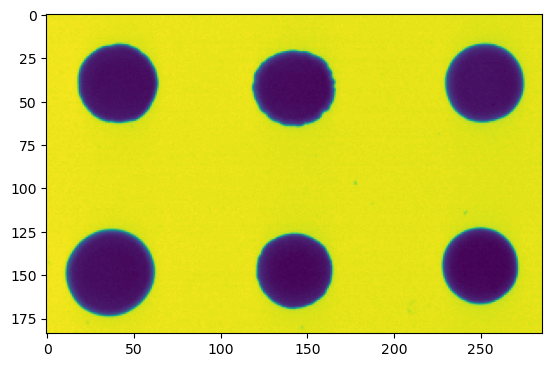

In [7]:
plt.imshow(colonies)

What's going on wiht our second image? `imshow` defaults to drawing images in color. To specify that we want to show a grayscale image we need to specify the "colormap" (cmap) as "gray".  

We also need to set `vmin` and `vmax` which give the minimum and maximum values of the pixel intensity. Since this is an 8-bit grayscale image, the minimum pixel intensity is 0 (pure black) and the maximum is 255 (pure white).

Note that when an input array is 3D, like `chester`, we don't need to set the `vmin` and `vmax` because matplotlib automatically assumes that the array being plotted is an RGB image and sets appropriate limits based on the data type in the array.

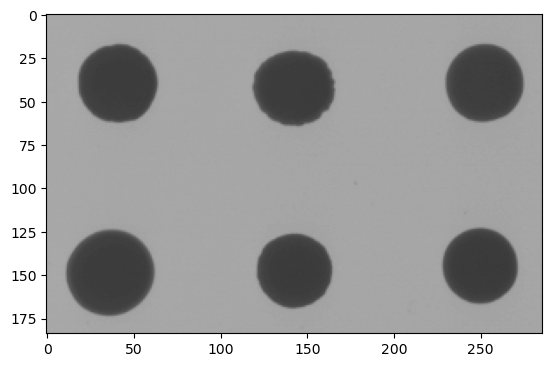

In [8]:
plt.imshow(colonies, cmap="gray", vmin=0, vmax=255)

Try plotting the colonies image without specifying `vmin` and `vmax`.  How does this differ from the image above? In the absence of a specified `vmin` and `vmax` matplotlib will "normalize" it's color map to the minimum and maximum values found in the array (see the [matplotlib docs on color normalization](https://matplotlib.org/stable/users/explain/colors/colormapnorms.html#colormapnorms) for more info).

# Basic image manipulation

Let's start with some basic image manipulation tasks, like extracting a region of interest from an image.

These basic manipulation tasks are achieved through simple indexing of the array.  Notice that for the `chester` image there are three axes we need to consider. The first axis represents rows of pixels (y-direction), the second axis represents columns (x-direction), and the third represents color "channels" or layers (RGB).

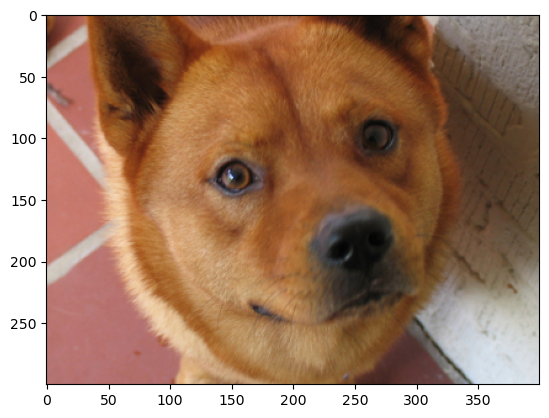

In [9]:
# extract a (300,400) sub-array, all 3 color layers
plt.imshow(chester[100:400, 100:500, :])

We can flip the image in the vertical direction by taking the rows in reverse order using a negative step index

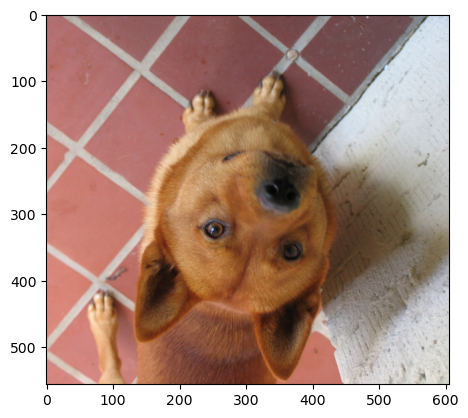

In [10]:
# Reverse one of the axes, notice the change in orientation
plt.imshow(chester[::-1, :, :])

We can rotate the image by transposition.  With a 2D array, transposition swaps rows and columns. Higher dimensional tranposition requires us to be explicit about what order or rearrangement want the dimensions in. Here we swap rows and columns but leave the color information unchanged.

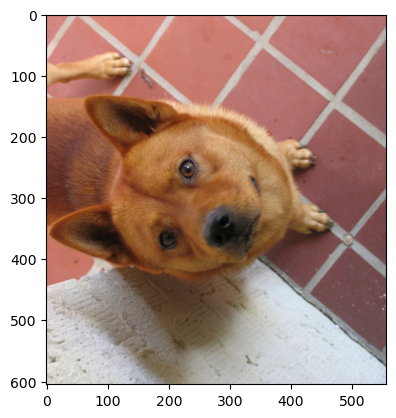

In [11]:
# Transpose the x,y axes
plt.imshow(np.transpose(chester, axes = [1,0,2]))

If we want to edit the image in place, we can replace values in memory. Here we copy the original image first so we still have a copy of the unedited version of chester.

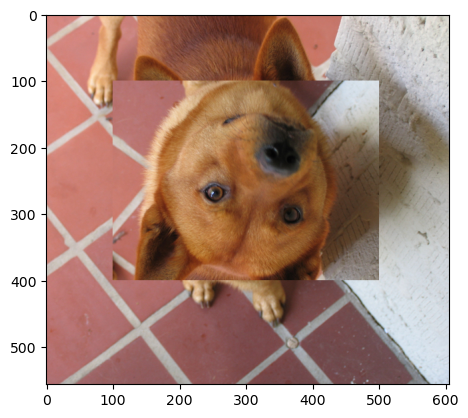

In [12]:
# Flip  a small section of the image "in place"

chester2 = chester.copy()  # make a copy of the array so we don't change original data

chester2[100:400, 100:500, :] = chester2[400:100:-1, 100:500, :]

plt.imshow(chester2)

Up to now we've been focused on the row and column data of the RGB image, but we can also manipulate the color channels (layers).

For example, we can extract each layer separately:

In [13]:
# extract the red, green, and blue channels separately

red_channel = chester[:,:,0]
green_channel = chester[:, :, 1]
blue_channel = chester[:, :, 2]

We can then plot just a single channel:

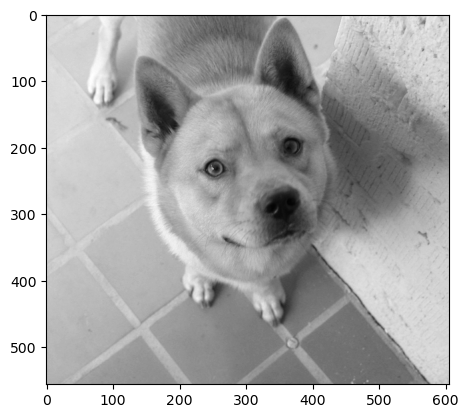

In [14]:
# Plot just the red channel data

plt.imshow(red_channel, cmap="gray", vmin=0, vmax=255)

Or all channels in a multi-plot layout:

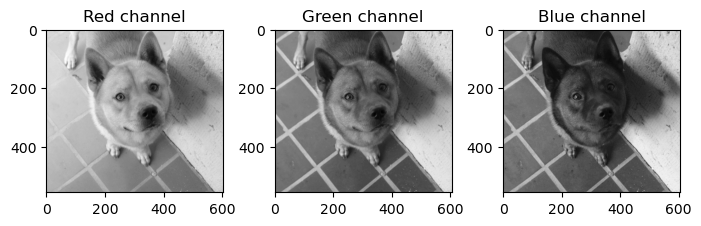

In [15]:
# plot all 3 channels side-by-side

fig, (sub1, sub2, sub3) = plt.subplots(nrows=1, ncols=3, figsize=(7,21))

sub1.imshow(red_channel, cmap="gray", vmin=0, vmax=255)
sub1.set_title("Red channel")

sub2.imshow(green_channel, cmap="gray", vmin=0, vmax=255)
sub2.set_title("Green channel")

sub3.imshow(blue_channel, cmap="gray", vmin=0, vmax=255)
sub3.set_title("Blue channel")

plt.tight_layout()  # ensures subaxes are layed out nicely



We can even manipulate the color channel information directly, or re-order the channels as shown below:

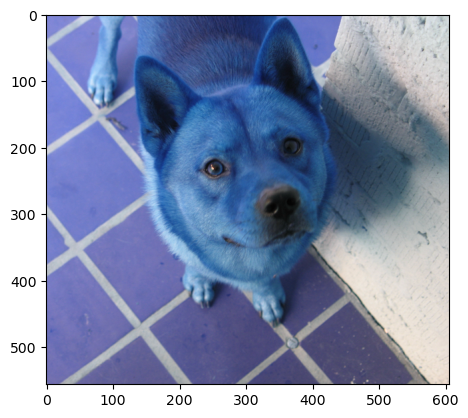

In [16]:
# create a new 3D array by re-stacking the color channels in a different order
psychedelic_chester = np.stack((blue_channel,  green_channel, red_channel), axis=2)

plt.imshow(psychedelic_chester)

# Combining manipulation and quantitation

In this second example we'll illustrate how to get quantititative information from images using a simple segmenetation and pixel counting procedure.

Our goal is the analyze the area (number of pixels) of each colony in the image below.

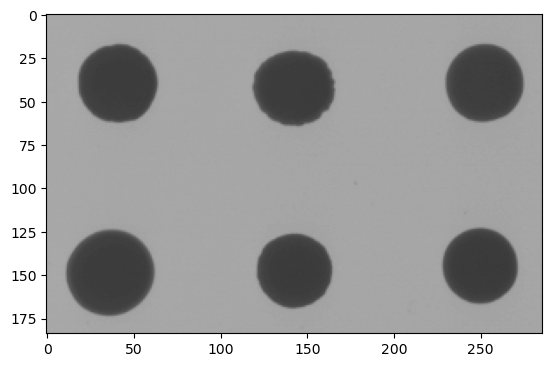

In [17]:
plt.imshow(colonies, cmap="gray", norm=None, vmin=0, vmax=255)

To accomplish this we're going to chop this single image into multiple sub-images (one for each colony) and analyze each subimage separately.

For simplicitly we'll cut into 100 x 100 pixel sub-images using the boundaries illustrated below.  We'll specify the positions of the subimages by giving the y- and x- start positions.

In [18]:
# Cutting out multiple slices of the image, each representing a colony

ystarts= [0, 100]
xstarts = [0, 100, 200]

In [19]:
# these tuples are the upper left corners of each sub-image we'll extract
for y in ystarts:
    for x in xstarts:
        print(x, y)

0 0
100 0
200 0
0 100
100 100
200 100


The code below illustrates each of sub-images we're extracting.  Note that some of the sub-images go beyond the 'border' of the array.  If we index beyond the maximum index, Python simply truncates at the maximum.

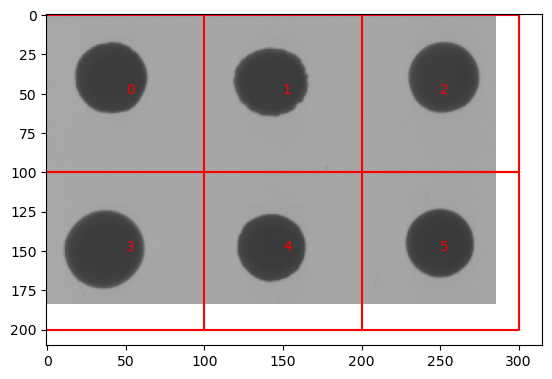

In [20]:
# let's draw the boundaries on the image

plt.imshow(colonies, cmap="gray", norm=None, vmin=0, vmax=255)

ct = 0
for y in ystarts:
    for x in xstarts:
        # plot the boundaries of the image rectangles
        ys = [y, y, y + 100, y + 100]
        xs = [x, x + 100, x + 100, x]
        plt.plot(xs, ys, color="red")
        # add some text numbering the sub-images
        plt.text(x + 50, y + 50, f"{ct}", color="red")
        ct += 1

In [21]:
# extract each subimage into a list

spots = []

for y in ystarts:
    for x in xstarts:
        spot = colonies[y:y+100, x:x+100]
        spots.append(spot)

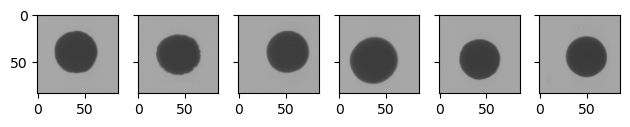

In [22]:
# plot all the individual subimages
# notice that the different subimages are not the same size
# however, this doesn't matter for our analysis to follow
# as long as each sub-image fully contains the colony we want to analyze

fig, axes = plt.subplots(nrows=1, ncols=6, sharex=True, sharey=True)

ct = 0
for spot in spots:
    axes[ct].imshow(spot, cmap="gray", vmin=0, vmax=255)
    ct += 1


plt.tight_layout()  

Here's what a single one of our sub-images looks like:

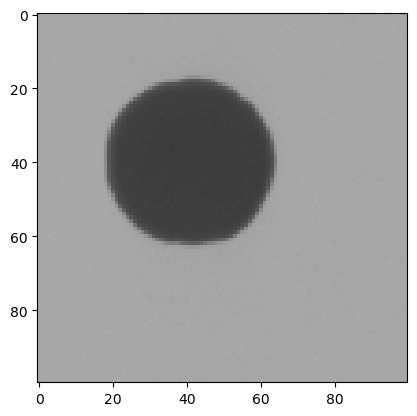

In [23]:
plt.imshow(spots[0], cmap="gray", vmin=0, vmax=255)

If we plot a histogram of the pixel values in the sub-image we get a bimodal distribution as shown below. The larger values represent "brighter" pixels (i.e. the light grey background) while the lower mode represents pixels in the colony itself.  It is those colony pixels that we want to count to estimate the size of each colony.

(0.0, 255.0)

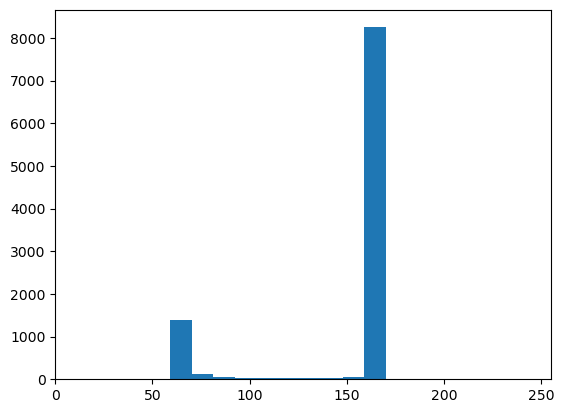

In [24]:
# create a histogram of the pixel intensity data in the first spot

plt.hist(spots[0].ravel())  # ravel() turns the 2-D array into a 1-D vector
plt.xlim(0,255)

When doing image segmentation it is common to binarize an image into "background" vs "foreground" pixels. Here the foreground of interest are the pixels in each colony. 

We can accomplish this by turning our integers array into an array of Booleans (True/False) values where True indicates a foreground pixel.

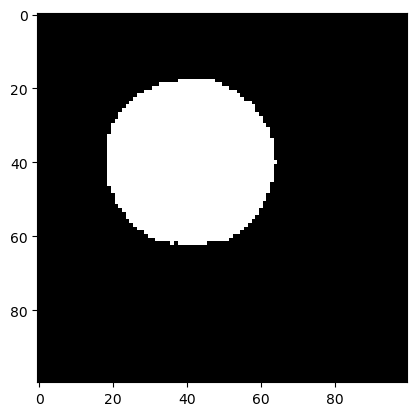

In [25]:
# binarize the image by setting all pixels with values below 125 to have True, all others to False
plt.imshow(spots[0] < 125 ,cmap="gray", norm=None, vmin=0, vmax=1)

In [26]:
# calculate the area of the colony as the number of pixels that are "True"

area0 = np.sum(spots[0]  < 125)
area0  

1635

If we want to automate this process for all colonies we can setup a for-loop:

In [27]:
# automate this process for all the spots

areas = []
binary_spots = []

for spot in spots:
    bin_spot = spot < 125
    binary_spots.append(bin_spot)
    areas.append(np.sum(bin_spot))

Here are the calculated areas for each colony:

In [28]:
areas

[1635, 1611, 1591, 1974, 1473, 1485]

And here's a depiction of each segmented sub-image:

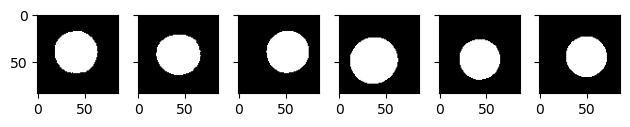

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=6, sharex=True, sharey=True)

ct = 0
for spot in binary_spots:
    axes[ct].imshow(spot, cmap="gray", vmin=0, vmax=1)  # note change of vmax
    ct += 1


plt.tight_layout()  

Instead of displaying the colonies in the order extracted from the starting image, we can plot them in decreadsing order of their size.

In [30]:
areas

[1635, 1611, 1591, 1974, 1473, 1485]

The numpy function `argsort` will give the indices that you would take the elements of an array to return them in sorted order.  Note that default sort order is from smallest to largest.

In [31]:
np.argsort(areas)

array([4, 5, 2, 1, 0, 3])

Using argsort then we can plot the segmented images from largest to smallest (after reversing the sort order)

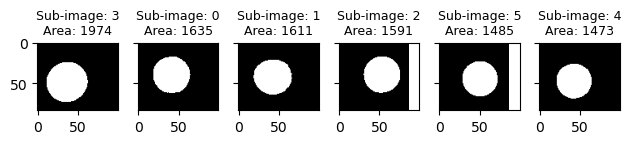

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=6, sharex=True, sharey=True)

ct = 0
for idx in reversed(np.argsort(areas)):
    axes[ct].imshow(binary_spots[idx], cmap="gray", vmin=0, vmax=1)  # note change of vmax
    axes[ct].set_title(f"Sub-image: {idx}\nArea: {areas[idx]}", fontsize=9)
    ct += 1


plt.tight_layout()  

## Breaking a complex problem up into parts using functions

A good strategy when faced with a complex computing problem is to break that problem up into a set of simpler sub-problems. We implement functions to solve the sub-problems and then write a wrapper function that call the supporting function to solve the original "higher order" problem.

Let's illustrate this strategy by expanding on the yeast colony image segmentation and quantification task we sketched out above.  In that example we showed how we could start with an image like this:

![yeast colonies](./yeast_colonies.png)

and segment it into black and white sub-image like this from which we measured the areas of each colony:

![subcolonies](./segmented_colonies.png)

#### Sketching out a solution

If you review the code blocks above you'll see that our image analysis steps involved:

1. Loading the image
2. Thresholding the image
3. Finding the regions in each image that corresponded to a colony
4. Analyzing the colony regions

Let's take these steps and write "mock" functions to represent each sub-problem as well as the pipeline as a whole.

In [1]:
def load_image():
    print("loading image")

def threshold_image():
    print("thresholding image")

def define_regions():
    print("defining regions")

def analyze_regions():
    print("analyzing regions")


def segment_and_measure():
    load_image()
    threshold_image()
    define_regions()
    analyze_regions()


The code above sketches out the logic of our pipeline. While it doesn't actually implement the key tasks, it will help us as we organize our code.  And we can actually run it at this point!

In [2]:
segment_and_measure()

loading image
thresholding image
defining regions
analyzing regions


Now let's actually implement each subfunction. The implementation of the sub-functions will largely follow the code in the earlier notebook, but we'll add some functionality along the way and for the latter steps where we identify and analyze the regions we'll make use of some functions from the [scikit-image](https://scikit-image.org/) library.

#### Library imports

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image 
import skimage

#### load_image()

The prior notebook showed the steps for loading an image using the `image.imread` function defined in matplolib. 

Since `imread` already exists, we don't really need to define our own function unless we want to add some additional functionality. For interactive analysis it can be useful to plot the image when we load it. So let's add some functionality to our `load_image` function that will allow us to optionally plot the image after loading.  In the spirit of encpasulating complexity, let's also write a helper function to do the plotting (`plot_image`) that allows use to specify whether the image should be plotted as RGB or grayscale (and the bitdepth). 

In [4]:
def load_image(fname, plot=False, grayscale=True, bitdepth=8):
    """Load a grescale image, returning it as an array.
    
    * if plot=True, generate an image plot at time of loading
    * bitdepth set's appropriate scaling of greyscale pixel intensities
    """
    img = image.imread(fname)
    if plot:
        plot_image(img, grayscale=grayscale, bitdepth=bitdepth)
    return img


def plot_image(img, grayscale=True, bitdepth=8, axes=None):
    if axes is None:
        axes = plt  # If no axes specified, using pyplot imshow
                    # otherwise will use the imshow method of provided axis
    if grayscale:
        axes.imshow(img, cmap="gray", vmin=0, vmax = 2**bitdepth - 1)
    else:
        axes.imshow(img)
     # return the "current" plotting axis if we want to use it again    
    return plt.gca() 




##### Testing our function

In [5]:
# test our function with keyword defaults
img = load_image("yeast_colonies.jpg")
img

array([[167, 166, 168, ..., 165, 164, 165],
       [167, 167, 166, ..., 166, 165, 164],
       [167, 167, 167, ..., 166, 164, 165],
       ...,
       [167, 168, 166, ..., 166, 165, 166],
       [167, 167, 168, ..., 165, 166, 165],
       [166, 166, 166, ..., 165, 166, 165]], dtype=uint8)

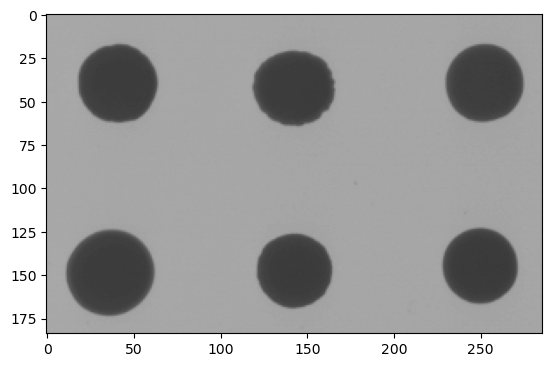

In [6]:
# now w/plot = True
img = load_image("yeast_colonies.jpg", plot=True)

<Axes: >

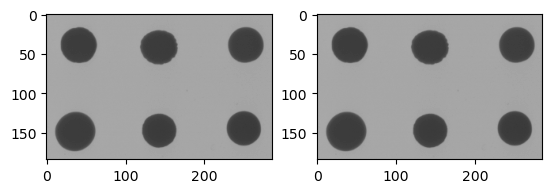

In [7]:
# test of our plot_image helper function separate from load_image
# confirm that it works as expected when we tell it which image axes to plot on

fig, axes = plt.subplots(1, 2)
plot_image(img, axes=axes[0])
plot_image(img, axes=axes[1])

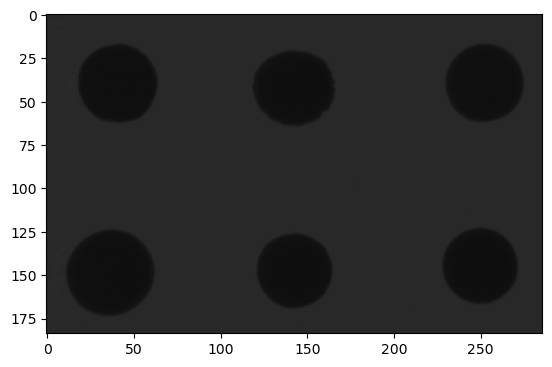

In [8]:
# the actual bit depth is 8-bits (the default), but let's see what happens if 
# we change it to a "wrong" value
img = load_image("yeast_colonies.jpg", plot=True, bitdepth=10)

#### Updating segment_and_measure

Having implemented and tested our `load_image` function, we need to update `segment_and_measure` to reflect the new call signature of `load_image`.

In [9]:
# note change in how we call `load_image`
def segment_and_measure(fname):
    img = load_image(fname)
    threshold_image()
    define_regions()
    analyze_regions()
    return img


In [10]:
# And test segment_and_measure 
img = segment_and_measure("yeast_colonies.jpg")

thresholding image
defining regions
analyzing regions


#### threshold_image()

Now let's implement and test our threshold_image function. Again, this is pretty simple code -- just a comparison step between our image array and the threshold. Once again, we add a keyword argument to plot the result. However, we've now turned this image into just True/False values so the bitdepth is 1.

In [11]:
def threshold_image(img, threshold, plot=False):
    """Threshold a grayscale image at the given threshold value.
    Assumes dark objects against a light background.
    """
    binimg =  img < threshold
    if plot:
        plot_image(binimg, grayscale=True, bitdepth=1)
    return binimg
        

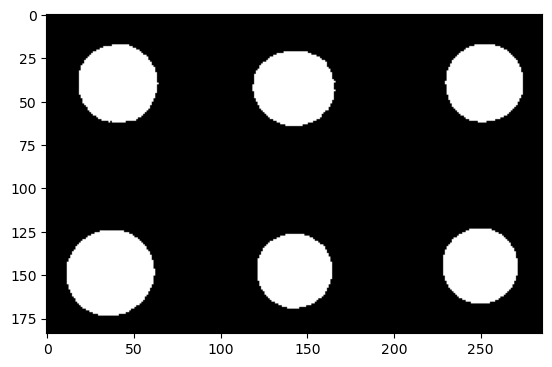

In [12]:
binimg = threshold_image(img, 125, plot=True)

#### A helper function for determining thresholds

In the examples above, I used a threshold of 125. But how did I determine that?  One way to do so is to look at a histogram of pixel intensities and use your judgement to determine a good cutoff value that separates background from foreground. Let's implementing a function to help us do that. 

NOTE: there are variety of algorithms that have been proposed for automatic thresholding, several of which are available in the skimage library. We won't explore those here, but if we were developing a fully automated image analysis pipeline we would likely want to look into that functionality.

In [13]:
def plot_image_histogram(img, bins=None):
    """Generate a pixel intensity histogram of an image. """
    plt.hist(img.ravel(), bins=bins)  
    plt.xlabel("Intensity")
    plt.ylabel("Count")
    plt.title("Histogram of pixel intensity\n(darker = smaller values)")



The optional bins argument of `plt.hist()` is by default `None` which means it will try and infer the best number of bins here we define our own optional argument to overridge this

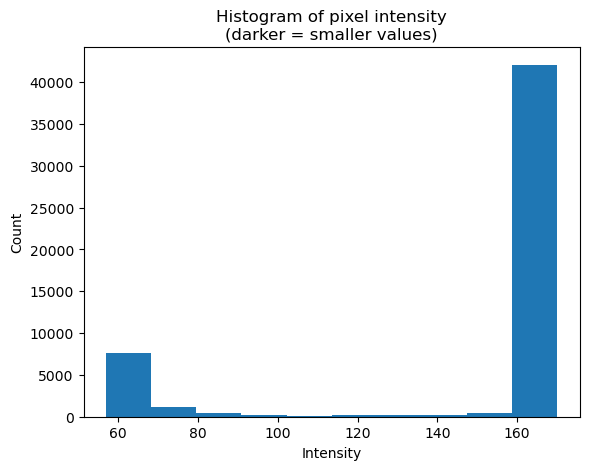

In [14]:
plot_image_histogram(img)

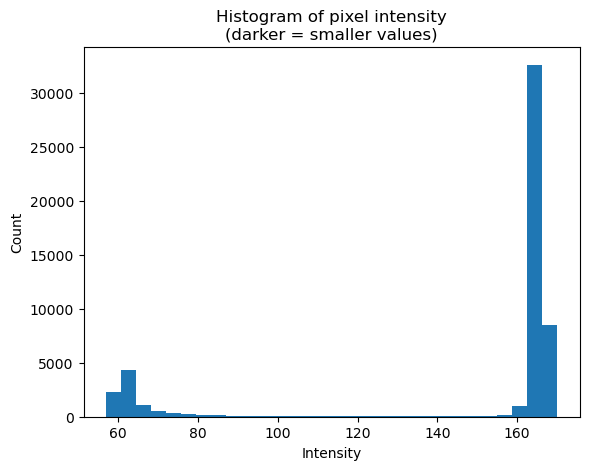

In [15]:
plot_image_histogram(img,30)

Having implemented this helper function, let's integrate it into `segment_and_measure`.  We do so by creating a new keyword argument `threshold`.  If threshold is None, we generate the histogram plot and exit the function early.  Otherwise, we assume the user has given us an appropriate threshold value and we pass it to `threshold_image`.

In [16]:
def segment_and_measure(fname, threshold=None):
    img = load_image(fname)

    if threshold is None:
        plot_image_histogram(img)
        print("Please specify a threshold for binarizing the image (see histogram).")
        return   # empty return statement returns None 
    
    binimg = threshold_image(img, threshold)
    
    define_regions()
    analyze_regions()
    return img, binimg

And as always, we test our revised function.

Please specify a threshold for binarizing the image (see histogram).


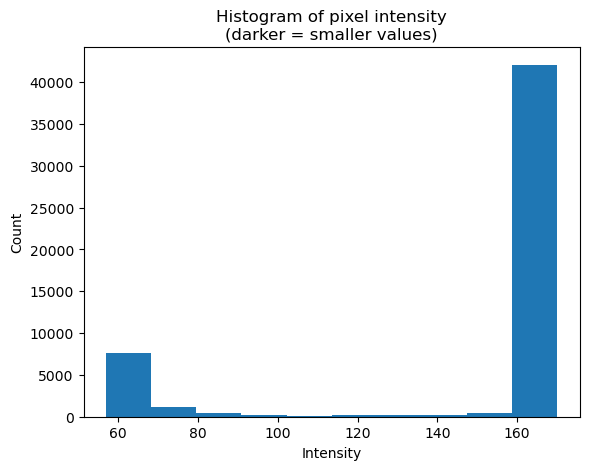

In [17]:
# testing without specifying a threshold
vals = segment_and_measure("yeast_colonies.jpg")

In [18]:
# and now testing with the threshold specified
vals = segment_and_measure("yeast_colonies.jpg", threshold=125)

defining regions
analyzing regions


#### define_regions()

In the `image_analysis_example.ipynb` notebook we delineated the regions to be analyzed by cutting the thresholded image into pieces, where each piece contained a colony of interest.  This worked for our small example, but isn't in general a good solution as we can't guarantee the colonies we're analyzing we'll always be in the same location in the image or even that we're always analyzing the same number of colonies. 

To solve this issue we turn to some functionality implemented in the `skimage` library. The `skimage.measure.label` function finds "connected regions" in a binary immage,  where "connected region" means region of non-zero (True in our case) pixels that are all neighbors of each other or are connected by chains of neighbors.  Visually, you can think of this function as finding all the islands of white pixels in our binarized (thresholded) image.

We can plot the labeled image as RGB, and each labeled region will be assigned it's own color.

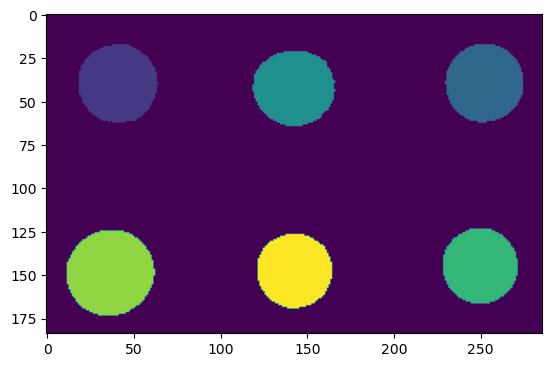

In [19]:
# plot the labeled image as a RGB image
# each label gets its own color
lblimg = skimage.measure.label(binimg)
plt.imshow(lblimg)

In [20]:
def define_regions(binimg, plot=False):
    """Label objects in a binarized image. """
    lblimg = skimage.measure.label(binimg)
    if plot:
        plot_image(lblimg, grayscale=False)
    return lblimg
        

##### A nicer visualization of  labeled regions

`skimage` provides an even nicer way to depict labeled image, implemented in the `label2rgb` fuction. This function takes a labeled image and turns it into an RGB image which we can plot, as shown below. 

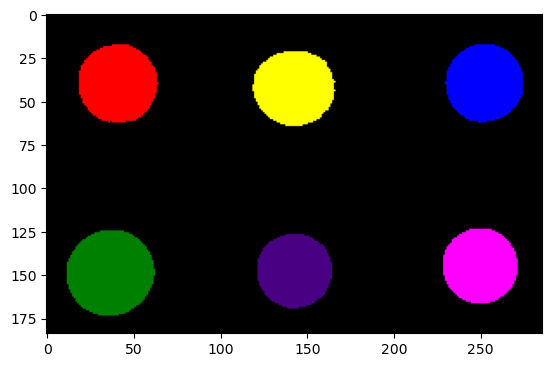

In [21]:
lbloverlay = skimage.color.label2rgb(lblimg)
plt.imshow(lbloverlay)

If we pass our original image to the `image=` argument of `label2rgb` it will plot the label regions as semi-transparent "overlays" on top of the original image.

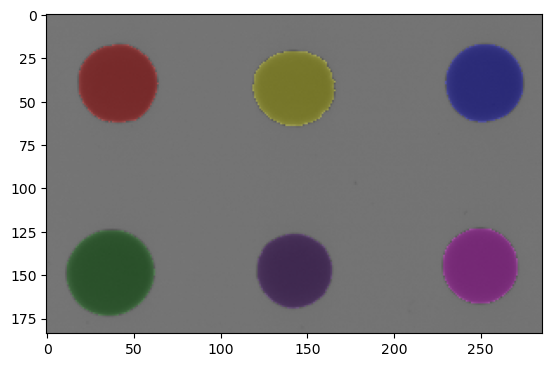

In [22]:
lbloverlay = skimage.color.label2rgb(lblimg, image=img)
plt.imshow(lbloverlay)

#### Updating segment_and_measure

Let's update `segment_and_measure` to include the signature for our updated `define_regions` and let's also add some functionality to plot the labeled images overlain on the original image.

In [23]:
def segment_and_measure(fname, threshold=None, plot=False):
    img = load_image(fname)

    if threshold is None:
        plot_image_histogram(img)
        print("Please specify a threshold for binarizing the image (see histogram).")
        return   # empty return statement returns None 
    binimg = threshold_image(img, threshold)

    lblimg = define_regions(binimg)

    if plot:
        lbloverlay = skimage.color.label2rgb(lblimg, image=img)
        plt.imshow(lbloverlay)

    analyze_regions()
    return img, binimg, lblimg

And as always, we test our updated function.

analyzing regions


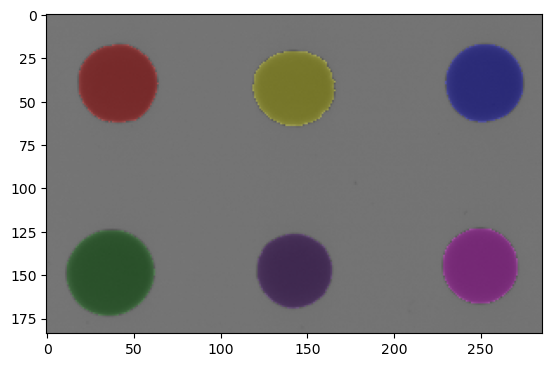

In [24]:
segment_and_measure("yeast_colonies.jpg", 125, plot=True)
pass

#### analyze_regions()

Our final step is to implement a function to analyze the regions we've segemented.  Here again `skimage` makes our lives easy by providing a function `skimage.measure.regionprops` that will return information on labeled regions in an image.  There is also a funciton `skimage.measure.regionprops_table` that will return the region information in the form of a dictionary we can use for access or pass to a Panda's data frame to create a table.

In this example we examine the "centroid" (geometric mean) and the area of each region. For a full list of region properties see the [skimage document on regionprops](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops).

In [25]:
regions = skimage.measure.regionprops(lblimg)

[(r.label, r.centroid, r.area) for r in regions]


[(1, (40.04954128440367, 40.94311926605505), 1635.0),
 (2, (39.73852922690132, 252.3419233186675), 1591.0),
 (3, (42.58783364369957, 142.55617628801986), 1611.0),
 (4, (144.93265993265993, 249.9043771043771), 1485.0),
 (5, (148.90932117527862, 36.59625126646403), 1974.0),
 (6, (147.71690427698573, 142.83638832315003), 1473.0)]

In [26]:
# same data as a dictionary
skimage.measure.regionprops_table(lblimg, properties=["label", "centroid", "area"])

{'label': array([1, 2, 3, 4, 5, 6]),
 'centroid-0': array([ 40.04954128,  39.73852923,  42.58783364, 144.93265993,
        148.90932118, 147.71690428]),
 'centroid-1': array([ 40.94311927, 252.34192332, 142.55617629, 249.9043771 ,
         36.59625127, 142.83638832]),
 'area': array([1635., 1591., 1611., 1485., 1974., 1473.])}

In [27]:
# we can take the dictionary returned by regionprops_table and pass
# it to a pandas dataframe to create a nice table

import pandas as pd

regiontbl = skimage.measure.regionprops_table(lblimg, properties=["label", "centroid", "area"])
pd.DataFrame(regiontbl)

label  centroid-0  centroid-1    area
0      1   40.049541   40.943119  1635.0
1      2   39.738529  252.341923  1591.0
2      3   42.587834  142.556176  1611.0
3      4  144.932660  249.904377  1485.0
4      5  148.909321   36.596251  1974.0
5      6  147.716904  142.836388  1473.0

We'll implement our `analyze_regions` function as a light wrapper around the two skimage functions discussed above.

In [28]:
def analyze_regions(lblimg, properties=["label", "centroid", "area"]):
    regions = skimage.measure.regionprops(lblimg)
    regiontbl = skimage.measure.regionprops_table(lblimg, properties=properties)
    return regions, regiontbl


In [29]:
# let's test our function
regions, tbl = analyze_regions(lblimg)

Finally, let's write a helper function to plot our labeled image with text  at the centroid of each labeled region indicating the assignment of regions to labels.

In [30]:

def plot_labelled_image(img, lblimg, regions, axes=None):
    lbloverlay = skimage.color.label2rgb(lblimg, image=img)
    axes = plot_image(lbloverlay, grayscale=False, axes=axes)
    for region in regions:
        y, x = region.centroid
        axes.text(x, y, region.label, color='red')

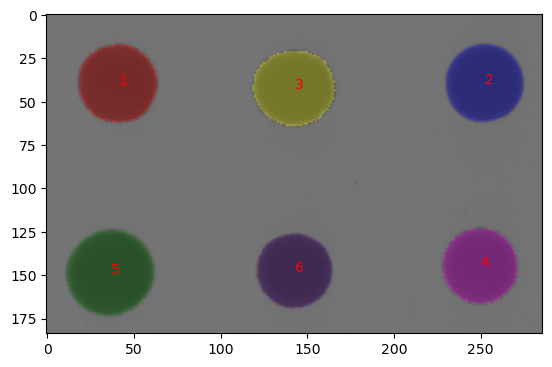

In [31]:
# test our helper function
plot_labelled_image(img, lblimg, regions)

In [32]:
# update our segment_and_measure function

def segment_and_measure(fname, threshold=None, plot=False):
    img = load_image(fname)

    if threshold is None:
        plot_image_histogram(img)
        print("Please specify a threshold for binarizing the image (see histogram).")
        return   # empty return statement returns None 
    binimg = threshold_image(img, threshold)

    lblimg = define_regions(binimg)

    regions, regiontbl = analyze_regions(lblimg)
    
    if plot:
        plot_labelled_image(img, lblimg, regions)
    
    return img, binimg, lblimg, regions, pd.DataFrame(regiontbl)

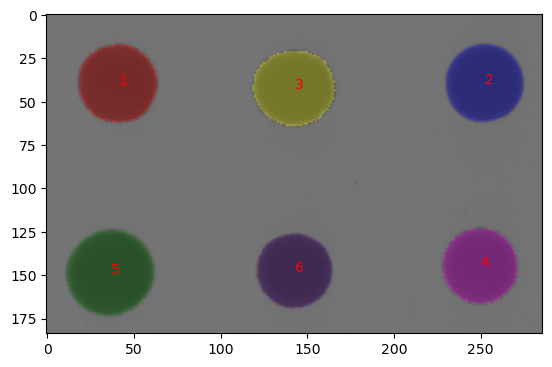

In [33]:
# test our updated segment_and_measure
img, binimg, lblimg, regions, regiontbl = segment_and_measure("yeast_colonies.jpg", threshold=125, plot=True)


In [34]:
# let's look at our region data in tabular format
regiontbl

label  centroid-0  centroid-1    area
0      1   40.049541   40.943119  1635.0
1      2   39.738529  252.341923  1591.0
2      3   42.587834  142.556176  1611.0
3      4  144.932660  249.904377  1485.0
4      5  148.909321   36.596251  1974.0
5      6  147.716904  142.836388  1473.0

### Testing with other inputs

Things look good on our simple test image. Let's try a few example using different image files

1. `example-easy-plate.jpg` -- a "simple" example where the colonies are well defined but we have more of them
2. `example-mixed-plate.jpg` -- a more difficult image to analyze where we have a mix of strong and weak growing colonies. 


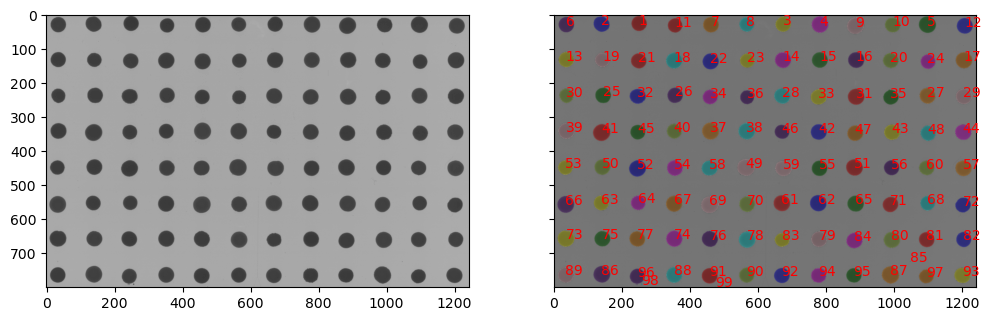

In [35]:
# The "easy" plate

img, binimg, lblimg, regions, regiontbl = segment_and_measure("example-easy-plate.jpg", threshold=125)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
plot_image(img, grayscale=True, axes=axes[0])
plot_labelled_image(img, lblimg, regions, axes=axes[1])

fig.set_size_inches(12,5)  # make our plots larger since we're laying them out side by side

pass


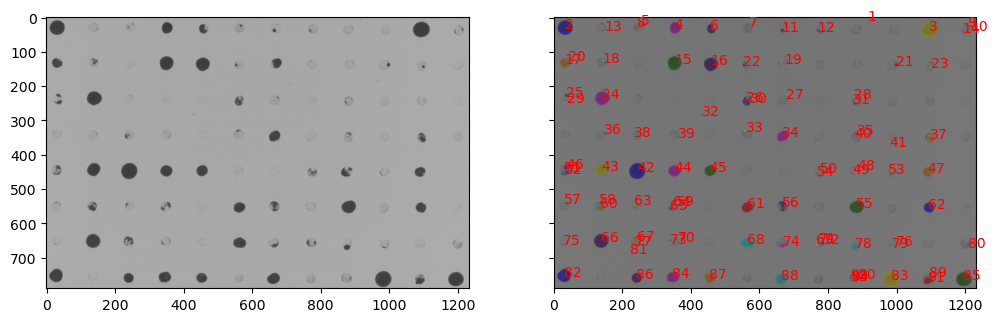

In [36]:
# And now the mixed plate

img, binimg, lblimg, regions, regiontbl = segment_and_measure("example-mixed-plate.jpg", threshold=125)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
plot_image(img, grayscale=True, axes=axes[0])
plot_labelled_image(img, lblimg, regions, axes=axes[1])

fig.set_size_inches(12,5)  # make our plots larger since we're laying them out side by side

pass


As we see, these additional test images reveal some new challenges. For example, even very small colonies or spots in the image can be called as distint regions.  Also, in the case where there is non-uniform growth the regions are called as distinct.  

In we developed this pipeline further we would probably want to implement additional functionality, like setting a minimum area for calling something a region of interest, or implementing some sort of technique for grouping regions based on their proximity.  These are too complex for this particular illustrative example, but are challenges that can be overcome.





### The final version of the pipeline

Finally, here's our pipeline all in one code cell. 

As this point we'd probably want to stick this in it's own Python code file (e.g. `segmenter.py`) so we could use it as a library.  We might even want to add some wrapper code that would allow us to call segment_and_measure as a command line program.  However, those are tasks that are beyond the scope of this particular tutorial so we'll save them for another time.

In [38]:
import numpy as np
from matplotlib import pyplot as plt
import skimage
import pandas as pd


def load_image(fname, plot=False, grayscale=True, bitdepth=8):
    """Load a grescale image, returning it as an array.
    
    * if plot=True, generate an image plot at time of loading
    * bitdepth set's appropriate scaling of greyscale pixel intensities
    """
    img = image.imread(fname)
    if plot:
        plot_image(img, grayscale=grayscale, bitdepth=bitdepth)
    return img


def plot_image(img, grayscale=True, bitdepth=8, axes=None):
    if axes is None:
        axes = plt  # If no axes specified, using pyplot imshow
                    # otherwise will use the imshow method of provided axis
    if grayscale:
        axes.imshow(img, cmap="gray", vmin=0, vmax = 2**bitdepth - 1)
    else:
        axes.imshow(img)
     # return the "current" plotting axis if we want to use it again    
    return plt.gca() 


def plot_image_histogram(img, bins=None):
    """Generate a pixel intensity histogram of an image. """
    plt.hist(img.ravel(), bins=bins)  
    plt.xlabel("Intensity")
    plt.ylabel("Count")
    plt.title("Histogram of pixel intensity\n(darker = smaller values)")


def threshold_image(img, threshold, plot=False):
    """Threshold a grayscale image at the given threshold value.
    Assumes dark objects against a light background.
    """
    binimg =  img < threshold
    if plot:
        plot_image(binimg, grayscale=True, bitdepth=1)
    return binimg


def define_regions(binimg, plot=False):
    """Label objects in a binarized image. """
    lblimg = skimage.measure.label(binimg)
    if plot:
        plot_image(skimage.color.label2rgb(lblimg), grayscale=False)
    return lblimg


def analyze_regions(lblimg, properties=["label", "centroid", "area"]):
    """Return properties of objects from a label image."""
    regions = skimage.measure.regionprops(lblimg)
    regiontbl = skimage.measure.regionprops_table(lblimg, properties=properties)
    return regions, regiontbl


def plot_labelled_image(img, lblimg, regions, axes=None):
    lbloverlay = skimage.color.label2rgb(lblimg, image=img)
    axes = plot_image(lbloverlay, grayscale=False, axes=axes)
    for region in regions:
        y, x = region.centroid
        axes.text(x, y, region.label, color='red')


def segment_and_measure(fname, threshold=None, plot=False):
    img = load_image(fname)

    if threshold is None:
        plot_image_histogram(img)
        print("Please specify a threshold for binarizing the image (see histogram).")
        return   # empty return statement returns None 
    binimg = threshold_image(img, threshold)

    lblimg = define_regions(binimg)

    regions, regiontbl = analyze_regions(lblimg)
    
    if plot:
        plot_labelled_image(img, lblimg, regions)
    
    return img, binimg, lblimg, regions, pd.DataFrame(regiontbl)